# 과적합 - Data Augmentation: CutOut

[Reference] Terrance DeVries, Graham W. Taylor (2017) "Improved Regularization of 
Convolutional Neural Networks with Cutout", CVPR2017

In [ ]:
import torch
import torchvision
import torchvision.transforms as tr
from torch.utils.data import DataLoader, Dataset 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
class CutOut:
    
    def __init__(self, ratio=.5):
        self.ratio = int(1/ratio)
           
    def __call__(self, inputs):

        active = int(np.random.randint(0, self.ratio, 1))
        
        
        if active == 0:
            _, h, w = inputs.size()
            min_len = min(h, w)
            w_c = int(np.random.randint(2, 8, 1))
            h_c = int(np.random.randint(2, 8, 1))
            w_size = int(min_len//w_c)
            h_size = int(min_len//h_c)
            th = max(w_size, h_size)
            idx = int(np.random.randint(0, min_len-th, 1))
            inputs[:,idx:idx+h_size,idx:idx+w_size] = 0
        
        return inputs

In [ ]:
transf = tr.Compose([tr.Resize(128), tr.ToTensor(), CutOut()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
def imshow(img):
    plt.figure(figsize=(20,200))
    plt.imshow(img.permute(1,2,0).numpy())
    plt.show()

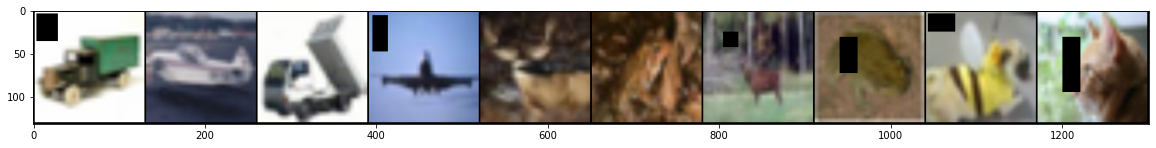

torch.Size([10, 3, 128, 128])


In [ ]:
trainloader = DataLoader(trainset, batch_size=10, shuffle=True)
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images,nrow=10))
print(images.size())